In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from ta import add_all_ta_features  # Install: pip install ta (for technical indicators)
from ta.utils import dropna

In [3]:
# Load data
df = pd.read_csv('../data/raw/merged_stock_data.csv')

# Asking Basic Question

In [4]:
df.shape

(10032, 62)

In [5]:
df['Ticker'].unique()


array(['A', 'ABBV', 'ABT', 'ACN', 'AES', 'AFL', 'AOS', 'MMM'],
      dtype=object)

In [6]:
df.head(3)

,Date,Open,High,Low,Close,Volume,Ticker,Symbol,AssetType,Name,...,52WeekHigh,52WeekLow,50DayMovingAverage,200DayMovingAverage,SharesOutstanding,SharesFloat,PercentInsiders,PercentInstitutions,DividendDate,ExDividendDate
0,2020-10-28,100.931654,101.849922,98.186533,98.263863,1180800,A,A,Common Stock,Agilent Technologies Inc,...,152.88,96.03,129.64,123.4,283500000,282491000,0.29,92.9,2025-10-22,2025-09-30
1,2020-10-29,98.853480,99.617089,97.403590,98.611832,1421900,A,A,Common Stock,Agilent Technologies Inc,...,152.88,96.03,129.64,123.4,283500000,282491000,0.29,92.9,2025-10-22,2025-09-30
2,2020-10-30,98.370195,98.930821,97.287615,98.679504,2310000,A,A,Common Stock,Agilent Technologies Inc,...,152.88,96.03,129.64,123.4,283500000,282491000,0.29,92.9,2025-10-22,2025-09-30


In [7]:
df.tail(3)

,Date,Open,High,Low,Close,Volume,Ticker,Symbol,AssetType,Name,...,52WeekHigh,52WeekLow,50DayMovingAverage,200DayMovingAverage,SharesOutstanding,SharesFloat,PercentInsiders,PercentInstitutions,DividendDate,ExDividendDate
10029,2025-10-22,167.160004,169.179993,165.529999,167.229996,5275800,MMM,MMM,Common Stock,3M Company,...,172.85,120.83,155.94,149.27,531225000,530439000,0.108,75.418,2025-09-12,2025-08-25
10030,2025-10-23,167.220001,171.630005,166.710007,171.600006,4779100,MMM,MMM,Common Stock,3M Company,...,172.85,120.83,155.94,149.27,531225000,530439000,0.108,75.418,2025-09-12,2025-08-25
10031,2025-10-24,172.000000,172.850006,167.750000,168.500000,3612300,MMM,MMM,Common Stock,3M Company,...,172.85,120.83,155.94,149.27,531225000,530439000,0.108,75.418,2025-09-12,2025-08-25


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10032 entries, 0 to 10031
Data columns (total 62 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        10032 non-null  object 
 1   Open                        10032 non-null  float64
 2   High                        10032 non-null  float64
 3   Low                         10032 non-null  float64
 4   Close                       10032 non-null  float64
 5   Volume                      10032 non-null  int64  
 6   Ticker                      10032 non-null  object 
 7   Symbol                      10032 non-null  object 
 8   AssetType                   10032 non-null  object 
 9   Name                        10032 non-null  object 
 10  Description                 10032 non-null  object 
 11  CIK                         10032 non-null  int64  
 12  Exchange                    10032 non-null  object 
 13  Currency                    100

In [9]:
df.describe()

,Open,High,Low,Close,Volume,CIK,MarketCapitalization,EBITDA,PERatio,PEGRatio,...,EVToRevenue,Beta,52WeekHigh,52WeekLow,50DayMovingAverage,200DayMovingAverage,SharesOutstanding,SharesFloat,PercentInsiders,PercentInstitutions
count,10032.000000,10032.000000,10032.000000,10032.000000,1.003200e+04,1.003200e+04,1.003200e+04,1.003200e+04,10032.000000,10032.000000,...,10032.000000,10032.000000,10032.000000,10032.00000,10032.000000,10032.00000,1.003200e+04,1.003200e+04,10032.000000,10032.000000
mean,118.436776,119.624071,117.249261,118.463596,3.989084e+06,6.436021e+05,1.235068e+11,8.401079e+09,32.566250,1.979250,...,4.491875,0.990875,163.402500,109.49250,134.900000,135.82250,7.878778e+08,7.986695e+08,1.612125,82.329125
std,80.554811,81.337719,79.814604,80.588348,3.743022e+06,6.338163e+05,1.257237e+11,8.450804e+09,29.488742,1.177774,...,1.884574,0.276776,106.573134,60.79137,70.520615,80.33625,5.849622e+08,5.675254e+08,3.382448,12.000242
min,9.412316,9.750671,9.275737,9.498665,2.150000e+05,1.800000e+03,9.674547e+09,7.681000e+08,10.940000,0.425000,...,2.134000,0.507000,16.400000,9.28000,13.610000,11.99000,1.142600e+08,2.260600e+08,0.076000,59.554000
25%,66.241577,66.864434,65.479964,66.214598,1.758300e+06,5.129925e+04,3.406501e+10,2.766500e+09,18.407500,1.051500,...,3.126500,0.810750,104.660000,86.58500,99.422500,96.47500,4.692938e+08,4.682645e+08,0.107000,75.211500
50%,105.986909,107.129221,104.957565,106.003483,3.059450e+06,4.829515e+05,7.424073e+10,4.803500e+09,22.255000,1.844500,...,3.976500,1.016000,146.105000,102.67500,130.860000,126.99000,5.774850e+08,5.747185e+08,0.377000,81.610000
75%,137.723903,139.115705,136.470470,137.835503,5.073850e+06,1.184997e+06,1.703773e+11,1.177288e+10,28.780000,2.464000,...,5.650000,1.266000,190.402500,130.19250,172.102500,161.52750,9.691522e+08,9.635775e+08,0.600250,93.224500
max,392.239689,394.411823,389.808609,394.312805,7.150840e+07,1.551152e+06,4.032169e+11,2.807400e+10,108.570000,4.168000,...,8.260000,1.303000,391.860000,227.92000,246.990000,298.84000,1.766558e+09,1.762937e+09,10.540000,98.751000


In [10]:
df.isnull().sum()

Date                   0
Open                   0
High                   0
Low                    0
Close                  0
                      ..
SharesFloat            0
PercentInsiders        0
PercentInstitutions    0
DividendDate           0
ExDividendDate         0
Length: 62, dtype: int64

# Creating Target Column: after next 30 days trend

In [11]:
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [12]:
# Sort by Ticker and Date to ensure chronological order per company
df = df.sort_values(['Ticker', 'Date']).reset_index(drop=True)

In [13]:
# Function to create target column: 1 if Close 30 days ahead > current Close, 0 otherwise, NaN if not enough future data
def create_target(group):
    group = group.copy()
    n = len(group)
    group['target'] = np.nan
    for i in range(n - 30):
        future_close = group.iloc[i + 30]['Close']
        current_close = group.iloc[i]['Close']
        group.iloc[i, group.columns.get_loc('target')] = 1 if future_close > current_close else 0
    return group

In [14]:
# Apply the function per ticker (company)
df = df.groupby('Ticker', group_keys=False).apply(create_target).reset_index(drop=True)

/tmp/ipykernel_20321/220151700.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('Ticker', group_keys=False).apply(create_target).reset_index(drop=True)


In [15]:
df.head()

,Date,Open,High,Low,Close,Volume,Ticker,Symbol,AssetType,Name,...,52WeekLow,50DayMovingAverage,200DayMovingAverage,SharesOutstanding,SharesFloat,PercentInsiders,PercentInstitutions,DividendDate,ExDividendDate,target
0,2020-10-28,100.931654,101.849922,98.186533,98.263863,1180800,A,A,Common Stock,Agilent Technologies Inc,...,96.03,129.64,123.4,283500000,282491000,0.29,92.9,2025-10-22,2025-09-30,1.0
1,2020-10-29,98.853480,99.617089,97.403590,98.611832,1421900,A,A,Common Stock,Agilent Technologies Inc,...,96.03,129.64,123.4,283500000,282491000,0.29,92.9,2025-10-22,2025-09-30,1.0
2,2020-10-30,98.370195,98.930821,97.287615,98.679504,2310000,A,A,Common Stock,Agilent Technologies Inc,...,96.03,129.64,123.4,283500000,282491000,0.29,92.9,2025-10-22,2025-09-30,1.0
3,2020-11-02,100.061710,101.830577,99.839397,101.724251,1572300,A,A,Common Stock,Agilent Technologies Inc,...,96.03,129.64,123.4,283500000,282491000,0.29,92.9,2025-10-22,2025-09-30,1.0
4,2020-11-03,102.874529,104.498406,102.594216,103.454483,1175000,A,A,Common Stock,Agilent Technologies Inc,...,96.03,129.64,123.4,283500000,282491000,0.29,92.9,2025-10-22,2025-09-30,1.0


In [16]:
df['target'].value_counts()

target
1.0    5458
0.0    4334
Name: count, dtype: int64

# Adding Return Column

In [17]:
# calculate returns and add as a new column and drop NaN values
df['Return'] = df.groupby('Ticker')['Close'].pct_change()
df = df.dropna()

In [18]:
df['Return']

1        0.003541
2        0.000686
3        0.030855
4        0.017009
5        0.013641
           ...   
9997    -0.008371
9998    -0.005974
9999     0.003201
10000    0.038419
10001   -0.010033
Name: Return, Length: 9784, dtype: float64

In [19]:
df.head()

,Date,Open,High,Low,Close,Volume,Ticker,Symbol,AssetType,Name,...,50DayMovingAverage,200DayMovingAverage,SharesOutstanding,SharesFloat,PercentInsiders,PercentInstitutions,DividendDate,ExDividendDate,target,Return
1,2020-10-29,98.853480,99.617089,97.403590,98.611832,1421900,A,A,Common Stock,Agilent Technologies Inc,...,129.64,123.4,283500000,282491000,0.29,92.9,2025-10-22,2025-09-30,1.0,0.003541
2,2020-10-30,98.370195,98.930821,97.287615,98.679504,2310000,A,A,Common Stock,Agilent Technologies Inc,...,129.64,123.4,283500000,282491000,0.29,92.9,2025-10-22,2025-09-30,1.0,0.000686
3,2020-11-02,100.061710,101.830577,99.839397,101.724251,1572300,A,A,Common Stock,Agilent Technologies Inc,...,129.64,123.4,283500000,282491000,0.29,92.9,2025-10-22,2025-09-30,1.0,0.030855
4,2020-11-03,102.874529,104.498406,102.594216,103.454483,1175000,A,A,Common Stock,Agilent Technologies Inc,...,129.64,123.4,283500000,282491000,0.29,92.9,2025-10-22,2025-09-30,1.0,0.017009
5,2020-11-04,104.459740,106.131950,103.657466,104.865707,1357300,A,A,Common Stock,Agilent Technologies Inc,...,129.64,123.4,283500000,282491000,0.29,92.9,2025-10-22,2025-09-30,1.0,0.013641


In [ ]:
# Calculate volatility (Standard Deviation)
volatility = df['Return'].std()
volatility
# very low volatility

np.float64(0.017095797689923063)

In [ ]:
# # Define functions for annualizing performance (monthly data uses periods_per_year=12)
def annualize_return(df, periods_per_year=12):
    compounded_growth = (1 + df['Return']).prod()
    n_periods = df['Return'].count()
    return compounded_growth**(periods_per_year/n_periods) - 1

def annualize_volatility(df, periods_per_year=12):
    return df['Return'].std() * (periods_per_year**0.5)

annual_return = annualize_return(df)
annual_volatility = annualize_volatility(df)

In [23]:
annual_return, annual_volatility

(np.float64(0.00460442308614617), np.float64(0.05922158038973077))

# Adding new columns for Wealth Index and Drawdowns

In [24]:
# Create the Wealth Index (Cumulative Product of R_t + 1)
df['Wealth'] = (1 + df['Return']).cumprod()

In [25]:
df["Wealth"]

1         1.003541
2         1.004230
3         1.035215
4         1.052823
5         1.067185
           ...    
9997     41.293453
9998     41.046765
9999     41.178155
10000    42.760175
10001    42.331151
Name: Wealth, Length: 9784, dtype: float64

In [27]:
# Calculate the Previous Peaks (Cumulative Maximum)
df['Previous_Peak'] = df['Wealth'].cummax()

In [28]:
df['Previous_Peak']

1         1.003541
2         1.004230
3         1.035215
4         1.052823
5         1.067185
           ...    
9997     42.758350
9998     42.758350
9999     42.758350
10000    42.760175
10001    42.760175
Name: Previous_Peak, Length: 9784, dtype: float64

In [29]:
# Calculate Drawdowns
df['Drawdown'] = df['Wealth'] - df['Previous_Peak']

In [31]:
# Find the Maximum Drawdown and the date it occurred
max_drawdown = df['Drawdown'].min()
max_drawdown_date = df['Drawdown'].idxmin()

max_drawdown, max_drawdown_date

(np.float64(-21.191985860422566), np.int64(9528))

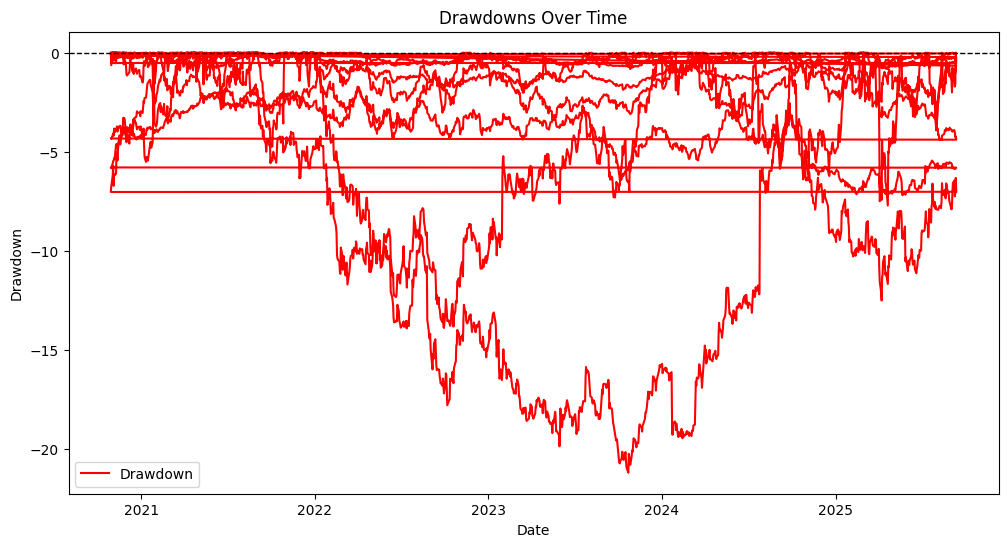

In [36]:
# Plot the Drawdowns

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Drawdown'], label='Drawdown', color='red')
plt.axhline(0, color='black', lw=1, ls='--')
plt.title('Drawdowns Over Time')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.legend()
plt.show()

# Keeping Essential Features

In [35]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Ticker', 'Symbol',
       'AssetType', 'Name', 'Description', 'CIK', 'Exchange', 'Currency',
       'Country', 'Sector', 'Industry', 'Address', 'OfficialSite',
       'FiscalYearEnd', 'LatestQuarter', 'MarketCapitalization', 'EBITDA',
       'PERatio', 'PEGRatio', 'BookValue', 'DividendPerShare', 'DividendYield',
       'EPS', 'RevenuePerShareTTM', 'ProfitMargin', 'OperatingMarginTTM',
       'ReturnOnAssetsTTM', 'ReturnOnEquityTTM', 'RevenueTTM',
       'GrossProfitTTM', 'DilutedEPSTTM', 'QuarterlyEarningsGrowthYOY',
       'QuarterlyRevenueGrowthYOY', 'AnalystTargetPrice',
       'AnalystRatingStrongBuy', 'AnalystRatingBuy', 'AnalystRatingHold',
       'AnalystRatingSell', 'AnalystRatingStrongSell', 'TrailingPE',
       'ForwardPE', 'PriceToSalesRatioTTM', 'PriceToBookRatio', 'EVToRevenue',
       'EVToEBITDA', 'Beta', '52WeekHigh', '52WeekLow', '50DayMovingAverage',
       '200DayMovingAverage', 'SharesOutstanding', 'SharesFl

In [38]:
df.shape

(9784, 67)

In [ ]:
# keeping best columns for further analysis and log it in log folder for why
df = df[['Date', 'Ticker', 'Sector', 'Industry', 'Open', 'High', 'Low', 'Close', 'Volume',
         'MarketCapitalization', 'EPS', 'PERatio', 'DividendYield', 'Beta', 'ReturnOnEquityTTM',
         '50DayMovingAverage', '200DayMovingAverage', '52WeekHigh', '52WeekLow',
         'target', 'Return', 'Wealth', 'Previous_Peak', 'Drawdown']]

In [41]:
df.shape

(9784, 24)